<a href="https://colab.research.google.com/github/widayatwidi/CNN-Malaria-Cells-Classification/blob/master/Baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT FINAL BANGKIT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/PROJECT_FINAL_BANGKIT/"

Dataset  Test-1.ipynb


**Start to code**

In [ ]:
# For data manipulation and visualization
# import all the library
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# For CNN model creation
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

# For working with images
import os
import cv2
from PIL import Image

In [ ]:
# import dataset

DATA_DIR = '/content/drive/My Drive/PROJECT_FINAL_BANGKIT/Dataset/cell_images/'

SIZE = 65
dataset = []
label = []

In [ ]:
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

In [ ]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

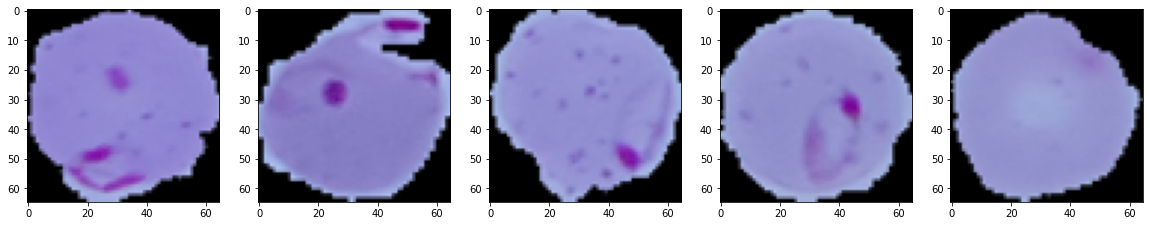

In [ ]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

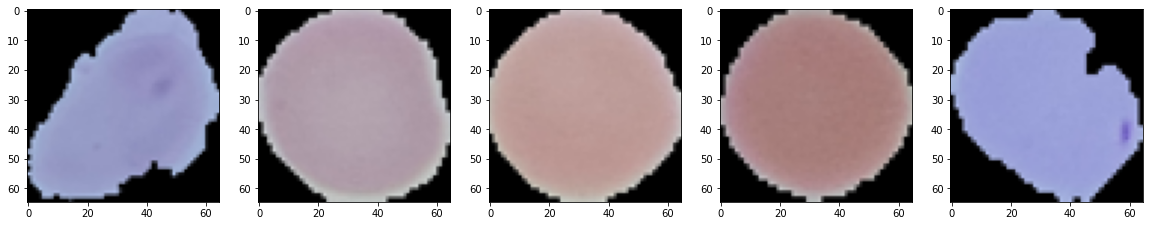

In [ ]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

In [ ]:
len(dataset)

9271

In [ ]:
classifier = None
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=2))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 63, 63, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)       

In [ ]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [ ]:
len(X_test)

1855

In [ ]:
history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 45, 
                         validation_split = 0.1,
                         shuffle = False)

Train on 6674 samples, validate on 742 samples
Epoch 1/45
 - 1s - loss: 0.0291 - accuracy: 0.9897 - val_loss: 1.3647 - val_accuracy: 0.8073
Epoch 2/45
 - 1s - loss: 0.0084 - accuracy: 0.9978 - val_loss: 0.2166 - val_accuracy: 0.9528
Epoch 3/45
 - 1s - loss: 0.0094 - accuracy: 0.9966 - val_loss: 0.2174 - val_accuracy: 0.9596
Epoch 4/45
 - 1s - loss: 0.0068 - accuracy: 0.9973 - val_loss: 0.2021 - val_accuracy: 0.9650
Epoch 5/45
 - 1s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.2989 - val_accuracy: 0.9461
Epoch 6/45
 - 1s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.2494 - val_accuracy: 0.9542
Epoch 7/45
 - 1s - loss: 0.0031 - accuracy: 0.9984 - val_loss: 0.2141 - val_accuracy: 0.9677
Epoch 8/45
 - 1s - loss: 0.0037 - accuracy: 0.9985 - val_loss: 0.2943 - val_accuracy: 0.9569
Epoch 9/45
 - 1s - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.2900 - val_accuracy: 0.9542
Epoch 10/45
 - 1s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.2188 - val_accuracy: 0.9704
Epoch 11/45
 - 1s - lo

In [ ]:
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(X_test), np.array(y_test))[1]*100))

1855/1855 [==============================] - 0s 124us/step
Test_Accuracy: 96.17%


**Try improving with augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255,
                                     zoom_range = 0.3,
                                     horizontal_flip = True,
                                     rotation_range = 30)

test_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

In [ ]:
history = classifier.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 45,
                                   shuffle = False)

Epoch 1/45
116/115 [==============================] - 8s 69ms/step - loss: 0.2557 - accuracy: 0.9306
Epoch 2/45
116/115 [==============================] - 8s 69ms/step - loss: 0.1557 - accuracy: 0.9489
Epoch 3/45
116/115 [==============================] - 8s 70ms/step - loss: 0.1431 - accuracy: 0.9542
Epoch 4/45
116/115 [==============================] - 8s 69ms/step - loss: 0.1296 - accuracy: 0.9570
Epoch 5/45
116/115 [==============================] - 8s 69ms/step - loss: 0.1330 - accuracy: 0.9566
Epoch 6/45
116/115 [==============================] - 8s 70ms/step - loss: 0.1308 - accuracy: 0.9559
Epoch 7/45
116/115 [==============================] - 8s 69ms/step - loss: 0.1256 - accuracy: 0.9587
Epoch 8/45
116/115 [==============================] - 8s 70ms/step - loss: 0.1126 - accuracy: 0.9608
Epoch 9/45
116/115 [==============================] - 8s 69ms/step - loss: 0.1150 - accuracy: 0.9633
Epoch 10/45
116/115 [==============================] - 8s 69ms/step - loss: 0.1171 - accura

In [ ]:
print("Test_Accuracy(after augmentation): {:.2f}%".format(classifier.evaluate_generator(test_generator, steps = len(X_test), verbose = 1)[1]*100))

1855/1855 [==============================] - 14s 7ms/step
Test_Accuracy(after augmentation): 94.72%


In [ ]:
classifier.save('/content/drive/My Drive/PROJECT_FINAL_BANGKIT/Model/model-testing-1.h5')
# model.save('model/model-lstm.h5')
print("Model has created!")

Model has created!
